In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import torch
import tensorflow as tf
%matplotlib inline

### Frequent Category Imputation

In [8]:
# df=pd.read_csv('./train.csv')
# df.columns

In [6]:
df=pd.read_csv('./train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [7]:
df.shape

(1460, 4)

In [11]:
# df.isnull().sum()
df.isnull().mean().sort_values(ascending=True) # For %

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [28]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<Axes: xlabel='None', ylabel='BsmtQual'>

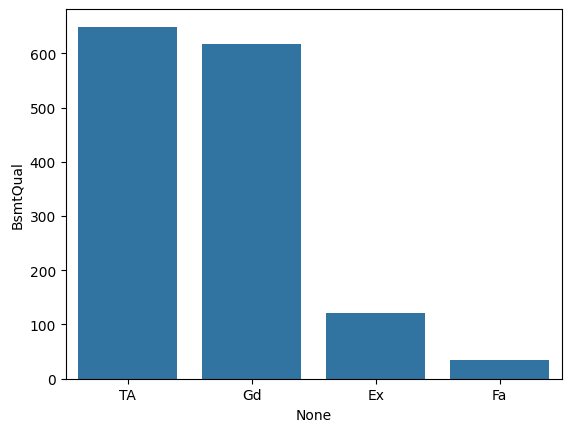

In [29]:
sns.barplot(x=df['BsmtQual'].value_counts().index,y=df['BsmtQual'].value_counts())

<Axes: >

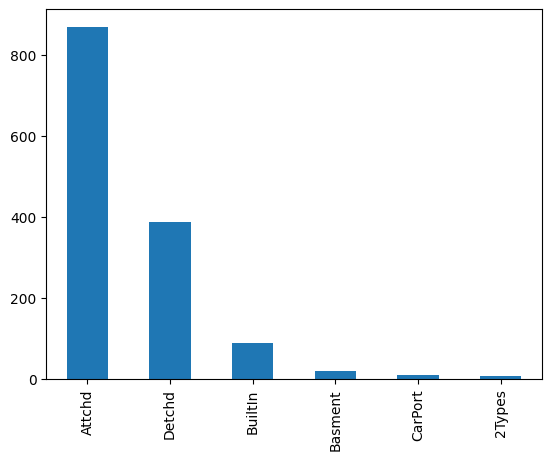

In [21]:
df['GarageType'].value_counts().plot.bar()

<Axes: >

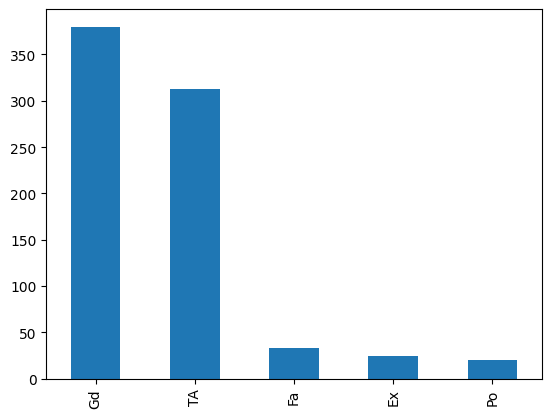

In [22]:
df['FireplaceQu'].value_counts().plot.bar()

In [23]:
df['GarageType'].mode()[0]

'Attchd'

In [24]:
def impute_max_freq(df,feature):
  maxFreqEl=df[feature].mode()[0]
  df[feature].fillna(maxFreqEl, inplace=True)

In [30]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
  impute_max_freq(df,feature)
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Adding variable to capture NaN

In [34]:
df=pd.read_csv('./train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(3)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500


In [35]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [40]:
df['BsmtQual_NaN']=np.where(df['BsmtQual'].isnull(),1,0)
# df.head(3)
df['BsmtQual_NaN'].value_counts()

0    1423
1      37
Name: BsmtQual_NaN, dtype: int64

In [42]:
maxFreqEl=df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(maxFreqEl, inplace=True)
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_NaN      0
dtype: int64

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_NaN
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
